# **Q1. Business Case: Netflix - Data Exploration and Visualisation**

## **Problem Statement:**
### Analyze the data to recommend Netflix the kind of shows to produce, where and when to produce/release them so as to grow the business.
### **Assumption:**
##### There are no details provided in the data to obtain enagement or monetory trends, so we have made a prior assumption that whatever information we gain from the data, is what working for the Netflix now and will work for Netflix in the future too. The recommendations are made accordingly.

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

***
***
#### **1. Analyze dimensions of the raw input dataset.**
##### From the output below we can see that the raw input dataset has total **8807 rows** and **12 columns**.
##### Also, we can see that only the **'release_year'** column has been imported as an **integer** by default.

In [218]:
df = pd.read_csv('netflix.csv')
print(f"Shape of the original dataset is : {df.shape}")
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in input dataset.\n")
print("Data types provided in the original dataset are :")
print(df.dtypes)

Shape of the original dataset is : (8807, 12)
There are 8807 rows and 12 columns in input dataset.

Data types provided in the original dataset are :
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


***
***
#### **2. Initial observations from the data.**

##### 1. The data has some columns with **NaN** values. Need to either replace them with appropriate values, or drop the rows/columns altogether.
##### 2. Columns like **director**, **cast**, **country** and **listed_in** have multiple values separated by comma. We will need to unnest these multi-value columns.
##### 3. Since we are not using NLP in this case study, we won't be able to obtain insights from the **description** column. Hence, we will drop the description column.

In [219]:
pd.concat([df.head(3), df.sample(3), df.tail(3)])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
1198,s1199,Movie,RebellComedy: Straight Outta the Zoo,Ladislaus Kiraly,"Khalid Bounouar, Alain Frei, Babak Ghassim, Be...",Germany,"March 16, 2021",2021,TV-MA,74 min,Stand-Up Comedy,The comics of RebellComedy take the stage and ...
2965,s2966,TV Show,No Game No Life,NaN,"Yoshitsugu Matsuoka, Ai Kayano, Yoko Hikasa, Y...",Japan,"February 1, 2020",2014,TV-MA,1 Season,"Anime Series, International TV Shows",Legendary gamer siblings Sora and Shiro are tr...
4138,s4139,Movie,Lego DC Comics: Batman Be-Leaguered,Rick Morales,"Dee Bradley Baker, Troy Baker, John DiMaggio, ...",United States,"February 1, 2019",2014,TV-Y7,22 min,Movies,When Superman and the other Justice League sup...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


***
***
#### **3. Analysis of missing data.**
##### The following output shows two different tables.
##### a. The first table shows the absolute count of non-null values for all the columns.
##### b. The second table shows the percentage of data available to be analysed for each column.

#### **Observations:**
##### a. Columns like **director**, **cast** and **country** have significant amount of data missing, which needs to be replaced with appropriate values.
##### b. Columns like **date_added**, **rating** and **duration** have insignificant amount of data missing.

In [220]:
df.drop('description', axis=1, inplace=True)
print(df.info())
print("\nData availability in percentages")
print("\nColumn:".ljust(19)," Data Availability")
for column in df.columns:
    print(f"{column}:".ljust(20),f"{round(len(df[~df[column].isnull()])*100/len(df[column]), 2)}%")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB
None

Data availability in percentages

Column:             Data Availability
show_id:             100.0%
type:                100.0%
title:               100.0%
director:            70.09%
cast:                90.63%
country:             90.56%
date_added:          99.89%
release_year:       

***
***
#### **4. Unnesting of Director, Cast, Country and Genre columns.**


In [221]:
director = pd.DataFrame(pd.DataFrame(df['director'].apply(lambda x: str(x).split(', ')).to_list(), index=df['show_id']).stack(), columns=['director'])
cast = pd.DataFrame(pd.DataFrame(df['cast'].apply(lambda x: str(x).split(', ')).to_list(), index=df['show_id']).stack(), columns=['cast'])
country = pd.DataFrame(pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).to_list(), index=df['show_id']).stack(), columns=['country'])
listed_in = pd.DataFrame(pd.DataFrame(df['listed_in'].apply(lambda x: str(x).split(', ')).to_list(), index=df['show_id']).stack(), columns=['listed_in'])
df = director.merge(cast, on='show_id').merge(country, on='show_id').merge(listed_in, on='show_id').merge(df.drop(['director', 'cast', 'country', 'listed_in'], axis=1), on='show_id')

In [222]:
df.head()

,show_id,director,cast,country,listed_in,type,title,date_added,release_year,rating,duration
0,s1,Kirsten Johnson,nan,United States,Documentaries,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min
1,s2,nan,Ama Qamata,South Africa,International TV Shows,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons
2,s2,nan,Ama Qamata,South Africa,TV Dramas,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons
3,s2,nan,Ama Qamata,South Africa,TV Mysteries,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons
4,s2,nan,Khosi Ngema,South Africa,International TV Shows,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons


***
***
#### **5. Initial analysis of data distribution for columns Movie type, Release year, Genres, Ratings, Country and Duration.**
##### The following output shows disribution of data in integer percentages for multiple tables.

#### **Observations:**
##### a. Movies constitute a major chunk **(69%)** of the content on Netflix. Rest **30%** are tv shows.
##### b. Majority **(70%)** of the content being streamed on Netflix was released after **2014**.
##### We can see a sudden drop in the content being released **since 2019**, which probably shows the effect of **Covid-19** on the production and release of movies/tv-shows.
##### c. Rating column has some invalid values, which needs to be fixed. Also, some ratings are redundant and need to be grouped together.
##### d. Duration column has movie duration (in minutes) and tv-show season counts together. Need to separate them.
##### Also, there's a need to convert these values to numeric values for better analysis.
##### e. International movies, Dramas and Comedies constitute a major chunk **(34%)** of the content on Netflix.
##### f. A huge part (**43%**) of the content on Netflix is produced only in the **United States** and **India**.


Percentage of data distribution in Movie type, Release year, Genres, Ratings, Country and Duration columns


Percentage of Data distribution in "type" column

Movie      69
TV Show    30
Name: type, dtype: int64


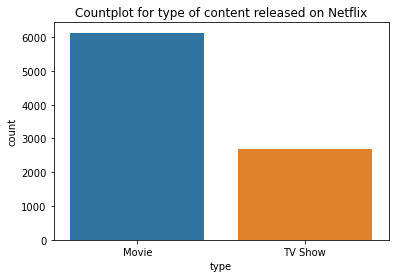



Percentage of Data distribution in "release_year" column

2018    13
2017    11
2019    11
2020    10
2016    10
2021     6
2015     6
2014     3
2013     3
2012     2
2010     2
2011     2
2009     1
2008     1
2006     1
2007     0
2005     0
2004     0
2003     0
2002     0
Name: release_year, dtype: int64


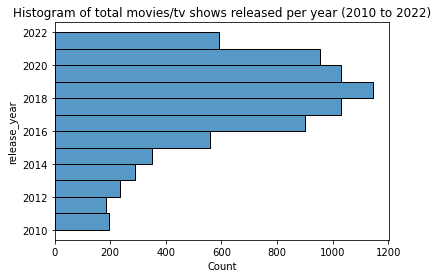



Percentage of Data distribution in "rating" column

TV-MA       36
TV-14       24
TV-PG        9
R            9
PG-13        5
TV-Y7        3
TV-Y         3
PG           3
TV-G         2
NR           0
G            0
TV-Y7-FV     0
NC-17        0
UR           0
74 min       0
84 min       0
66 min       0
Name: rating, dtype: int64


Percentage of Data distribution in "duration" column

1 Season     20
2 Seasons     4
3 Seasons     2
90 min        1
94 min        1
97 min        1
93 min        1
91 min        1
95 min        1
96 min        1
92 min        1
102 min       1
98 min        1
99 min        1
101 min       1
88 min        1
103 min       1
106 min       1
100 min       1
89 min        1
Name: duration, dtype: int64


Percentage of Data distribution in "listed_in" column

International Movies        14
Dramas                      12
Comedies                     8
International TV Shows       6
Documentaries                4
Action & Adventure           4
Children & Famil

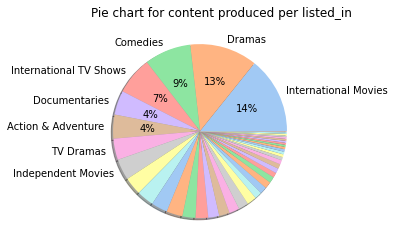



Percentage of Data distribution in "country" column

United States     34
India              9
nan                7
United Kingdom     7
Canada             4
France             3
Japan              2
Spain              2
South Korea        2
Germany            2
Australia          1
Egypt              1
Turkey             1
China              1
Mexico             1
Cayman Islands     0
Afghanistan        0
Samoa              0
Azerbaijan         0
East Germany       0
Name: country, dtype: int64


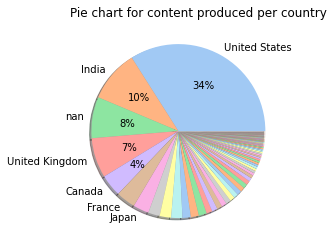

In [223]:
print("\nPercentage of data distribution in Movie type, Release year, Genres, Ratings, Country and Duration columns")
for column in ['type', 'release_year', 'rating', 'duration']:
    print(f"\n\nPercentage of Data distribution in \"{column}\" column\n")
    print((df[['show_id', column]].drop_duplicates()[column].value_counts()*100//len(df[['show_id', column]].drop_duplicates()[column])).head(20))
    if column == 'type':
        sns.countplot(x = column, data=df[['show_id', column]].drop_duplicates()).set(title="Countplot for type of content released on Netflix")
        plt.show()
    if column == 'release_year':
        sns.histplot(data=df[['show_id', column]].drop_duplicates(), y=column, binrange=(2010, 2022), binwidth=1).set(title='Histogram of total movies/tv shows released per year (2010 to 2022)')
        plt.show()
for column in ['listed_in', 'country']:
    print(f"\n\nPercentage of Data distribution in \"{column}\" column\n")
    print((df[['show_id', column]].drop_duplicates()[column].value_counts()*100//len(df[['show_id', column]].drop_duplicates()[column])).sort_values(ascending=False).head(20))
    if column in ['country', 'listed_in']:
        colors = sns.color_palette('pastel')
        lab = df[['show_id', column]].drop_duplicates()[column].value_counts().reset_index()
        limit = 0
        if column == 'country':
            limit = 250
        else:
            limit = 700
        lab.loc[lab[column]<=limit, 'index'] = ''
        plt.pie(df[['show_id', column]].drop_duplicates()[column].value_counts(), labels=lab['index'], colors=colors, autopct=lambda x: ('%.0f%%' % x) if x>=4 else '', shadow=True, rotatelabels=False)
        plt.title(f"Pie chart for content produced per {column}", loc='left')
        plt.show()

***
***
#### **6. Standardizing and analyzing rating values.**
##### The following code snippet groups redundant rating values together as well as fix the invalid rating values.

#### **Observations:**
##### a. A major chunk **(42-46%)** of the content **(both movies and tv-shows)** is suitable for **mature adults** only.
##### Also, a huge portion **(69-77%)** of the content **(both movies and tv-shows)** on netflix is not suitable for the audience **under 14 years** of age.

In [224]:
show_ids = df[(df['rating'] == '74 min') | (df['rating'] == '84 min') | (df['rating'] == '66 min')]['show_id']
mask = df['show_id'].isin(show_ids)
df.loc[mask, 'duration'] = df.loc[mask, 'rating']
df.loc[mask, 'rating'] = 'UR'

replace_dict = {'rating': {'TV-MA':'TV-MA', 'TV-14':'TV-14', 'TV-PG':'TV-PG', 'R':'TV-MA', 'PG-13':'TV-14', 'TV-Y7':'TV-Y7', \
                'PG':'TV-PG', 'TV-G':'TV-Y', 'NR':'UR', 'G':'TV-Y', 'TV-Y7-FV':'TV-Y7', 'NC-17':'TV-MA', 'UR':'UR'}}
df[['rating']] = df[['rating']].replace(replace_dict)


Ratings distribution for movies in percentage

TV-MA    46
TV-14    31
TV-PG    13
TV-Y      4
TV-Y7     2
UR        1
Name: rating, dtype: int64 



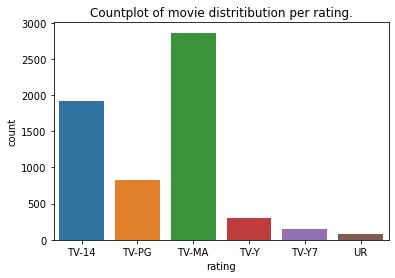



Ratings distribution for tv shows in percentage

TV-MA    42
TV-14    27
TV-PG    12
TV-Y     10
TV-Y7     7
UR        0
Name: rating, dtype: int64 



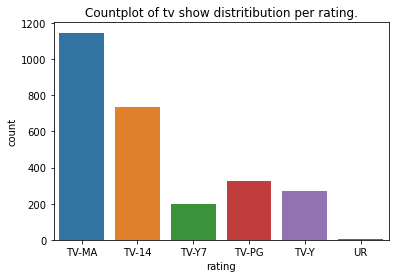

In [225]:
print("\nRatings distribution for movies in percentage\n")
print((df[df['type']=='Movie'][['show_id', 'rating']].drop_duplicates()['rating'].value_counts()*100//len(df[df['type']=='Movie'][['show_id', 'rating']].drop_duplicates()['rating'])).head(20), '\n')
sns.countplot(x = 'rating', data=df[df['type']=='Movie'][['show_id', 'rating']].drop_duplicates()).set(title="Countplot of movie distritibution per rating.")
plt.show()

print("\n\nRatings distribution for tv shows in percentage\n")
print((df[df['type']=='TV Show'][['show_id', 'rating']].drop_duplicates()['rating'].value_counts()*100//len(df[df['type']=='TV Show'][['show_id', 'rating']].drop_duplicates()['rating'])).head(20), '\n')
sns.countplot(x = 'rating', data=df[df['type']=='TV Show'][['show_id', 'rating']].drop_duplicates()).set(title="Countplot of tv show distritibution per rating.")
plt.show()

***
***
#### **7. Handling nan and analyzing country values.**

#### **Observations:**
##### a. A huge chunk **(30-35%)** of the content on Netflix **(both movies and tv-shows)** is produced in **United States** only.


Distribution of movies produced per country in percentage

United States     35
India             12
United Kingdom     6
Unknown            5
Canada             4
France             3
Germany            2
Spain              2
Japan              1
China              1
Mexico             1
Egypt              1
Hong Kong          1
Nigeria            1
Australia          1
Indonesia          1
Turkey             1
Philippines        1
Belgium            0
Italy              0
Name: country, dtype: int64


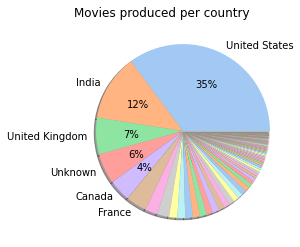



Distribution of tv shows produced per country in percentage

United States     30
Unknown           12
United Kingdom     8
Japan              6
South Korea        5
Canada             4
France             2
India              2
Taiwan             2
Australia          2
Spain              2
Mexico             1
China              1
Germany            1
Colombia           1
Brazil             1
Turkey             0
Italy              0
Thailand           0
Singapore          0
Name: country, dtype: int64


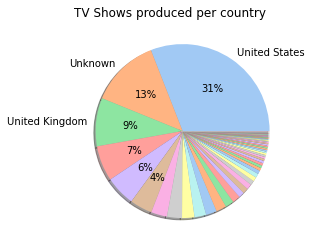

In [226]:
df['country'].replace('nan', 'Unknown', inplace=True)

print("\nDistribution of movies produced per country in percentage\n")
print((df[df['type']=='Movie'][['show_id', 'country']].drop_duplicates()['country'].value_counts()*100//len(df[df['type']=='Movie'][['show_id', 'country']].drop_duplicates()['country'])).head(20))
colors = sns.color_palette('pastel')
lab = df[df['type']=='Movie'][['show_id', 'country']].drop_duplicates()['country'].value_counts().reset_index()
limit = 200
lab.loc[lab['country']<=limit, 'index'] = ''
plt.pie(df[df['type']=='Movie'][['show_id', 'country']].drop_duplicates()['country'].value_counts(), labels=lab['index'], colors=colors, autopct=lambda x: ('%.0f%%' % x) if x>=4 else '', shadow=True, rotatelabels=False)
plt.title(f"Movies produced per country", loc='left')
plt.show()

print("\n\nDistribution of tv shows produced per country in percentage\n")
print((df[df['type']=='TV Show'][['show_id', 'country']].drop_duplicates()['country'].value_counts()*100//len(df[df['type']=='TV Show'][['show_id', 'country']].drop_duplicates()['country'])).head(20))
colors = sns.color_palette('pastel')
lab = df[df['type']=='TV Show'][['show_id', 'country']].drop_duplicates()['country'].value_counts().reset_index()
limit = 200
lab.loc[lab['country']<=limit, 'index'] = ''
plt.pie(df[df['type']=='TV Show'][['show_id', 'country']].drop_duplicates()['country'].value_counts(), labels=lab['index'], colors=colors, autopct=lambda x: ('%.0f%%' % x) if x>=4 else '', shadow=True, rotatelabels=False)
plt.title(f"TV Shows produced per country", loc='left')
plt.show()


***
***
#### **8. Analyzing genre values.**

#### **Observations:**
##### a. International content, comedy and drama constitutes a major chunk **(43-50%)** of the content on Netflix.


Distribution of movies produced per genre in percentage

International Movies        20
Dramas                      18
Comedies                    12
Documentaries                6
Action & Adventure           6
Independent Movies           5
Children & Family Movies     4
Romantic Movies              4
Thrillers                    4
Music & Musicals             2
Horror Movies                2
Stand-Up Comedy              2
Sci-Fi & Fantasy             1
Sports Movies                1
Classic Movies               0
LGBTQ Movies                 0
Anime Features               0
Cult Movies                  0
Faith & Spirituality         0
Movies                       0
Name: listed_in, dtype: int64


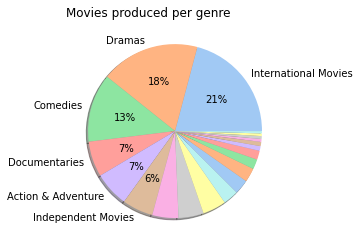



Distribution of tv shows produced per genre in percentage

International TV Shows          22
TV Dramas                       12
TV Comedies                      9
Crime TV Shows                   7
Kids' TV                         7
Docuseries                       6
Romantic TV Shows                6
Reality TV                       4
British TV Shows                 4
Anime Series                     2
Spanish-Language TV Shows        2
TV Action & Adventure            2
Korean TV Shows                  2
TV Mysteries                     1
Science & Nature TV              1
TV Sci-Fi & Fantasy              1
TV Horror                        1
Teen TV Shows                    1
TV Thrillers                     0
Stand-Up Comedy & Talk Shows     0
Name: listed_in, dtype: int64


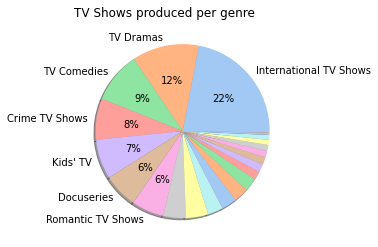

In [227]:
print("\nDistribution of movies produced per genre in percentage\n")
print((df[df['type']=='Movie'][['show_id', 'listed_in']].drop_duplicates()['listed_in'].value_counts()*100//len(df[df['type']=='Movie'][['show_id', 'listed_in']].drop_duplicates()['listed_in'])).head(20))
colors = sns.color_palette('pastel')
lab = df[df['type']=='Movie'][['show_id', 'listed_in']].drop_duplicates()['listed_in'].value_counts().reset_index()
limit = 650
lab.loc[lab['listed_in']<=limit, 'index'] = ''
plt.pie(df[df['type']=='Movie'][['show_id', 'listed_in']].drop_duplicates()['listed_in'].value_counts(), labels=lab['index'], colors=colors, autopct=lambda x: ('%.0f%%' % x) if x>=5 else '', shadow=True, rotatelabels=False)
plt.title(f"Movies produced per genre", loc='left')
plt.show()

print("\n\nDistribution of tv shows produced per genre in percentage\n")
print((df[df['type']=='TV Show'][['show_id', 'listed_in']].drop_duplicates()['listed_in'].value_counts()*100//len(df[df['type']=='TV Show'][['show_id', 'listed_in']].drop_duplicates()['listed_in'])).head(20))
colors = sns.color_palette('pastel')
lab = df[df['type']=='TV Show'][['show_id', 'listed_in']].drop_duplicates()['listed_in'].value_counts().reset_index()
limit = 350
lab.loc[lab['listed_in']<=limit, 'index'] = ''
plt.pie(df[df['type']=='TV Show'][['show_id', 'listed_in']].drop_duplicates()['listed_in'].value_counts(), labels=lab['index'], colors=colors, autopct=lambda x: ('%.0f%%' % x) if x>=5 else '', shadow=True, rotatelabels=False)
plt.title(f"TV Shows produced per genre", loc='left')
plt.show()


***
***
#### **9. Handling nan and analyzing director values.**

#### **Observations:**
##### a. Directors like **Rajiv Chilaka**, **Jan Suter** and **Raul Campos** are the top 3 directors in the world by number of movies directed.
##### b. Directors like **Alastair Fothergill**, and **Ken Burns** are the topmost directors in the world by number of tv  shows directed.

In [228]:
df['director'].replace('nan', 'Unknown', inplace=True)

print("\nDistribution of movies produced by each director in total counts\n")
print((df[df['type']=='Movie'][['show_id', 'director']].drop_duplicates()['director'].value_counts()).head(20))

print("\n\nDistribution of tv shows produced by each director in total counts\n")
print((df[df['type']=='TV Show'][['show_id', 'director']].drop_duplicates()['director'].value_counts()).head(20))


Distribution of movies produced by each director in total counts

Unknown                188
Rajiv Chilaka           22
Jan Suter               21
Raúl Campos             19
Suhas Kadav             16
Marcus Raboy            15
Jay Karas               15
Cathy Garcia-Molina     13
Jay Chapman             12
Youssef Chahine         12
Martin Scorsese         12
Steven Spielberg        11
Don Michael Paul        10
David Dhawan             9
Yılmaz Erdoğan           9
Shannon Hartman          9
Robert Rodriguez         8
Hanung Bramantyo         8
Johnnie To               8
Hakan Algül              8
Name: director, dtype: int64


Distribution of tv shows produced by each director in total counts

Unknown                  2446
Alastair Fothergill         3
Ken Burns                   3
Iginio Straffi              2
Gautham Vasudev Menon       2
Hsu Fu-chun                 2
Stan Lathan                 2
Shin Won-ho                 2
Joe Berlinger               2
Lynn Novick             

***
***
#### **10. Handling nan and analyzing cast values.**

#### **Observations:**
##### a. **Takahiro Sakurai** has acted in most number of tv shows **(25)** on Netflix.
##### b. **Anupam Kher** has acted in most number of movies **(42)** on Netflix.

In [229]:
df['cast'].replace('nan', 'Unknown', inplace=True)

print("\nDistribution of movies per actor in total counts\n")
print((df[df['type']=='Movie'][['show_id', 'cast']].drop_duplicates()['cast'].value_counts()).head(20))

print("\n\nDistribution of tv shows per actor in total counts\n")
print((df[df['type']=='TV Show'][['show_id', 'cast']].drop_duplicates()['cast'].value_counts()).head(20))


Distribution of movies per actor in total counts

Unknown                475
Anupam Kher             42
Shah Rukh Khan          35
Naseeruddin Shah        32
Om Puri                 30
Akshay Kumar            30
Paresh Rawal            28
Julie Tejwani           28
Amitabh Bachchan        28
Rupa Bhimani            27
Boman Irani             27
Kareena Kapoor          25
Samuel L. Jackson       22
Rajesh Kava             21
Ajay Devgn              21
Salman Khan             20
Adam Sandler            20
Nicolas Cage            20
Kay Kay Menon           20
Nawazuddin Siddiqui     20
Name: cast, dtype: int64


Distribution of tv shows per actor in total counts

Unknown                350
Takahiro Sakurai        25
Yuki Kaji               19
Daisuke Ono             17
Junichi Suwabe          17
Ai Kayano               17
Yuichi Nakamura         16
Yoshimasa Hosoya        15
Jun Fukuyama            15
David Attenborough      14
Yoshitsugu Matsuoka     13
Vincent Tong            13
Takehi

***
***
#### **11. Standardizing and separating duration values.**

In [230]:
def get_duration_in_minutes(input_str):
    if 'min' in input_str.lower():
        return int(input_str.split()[0])
    return 0

def get_season_counts(input_str):
    if 'season' in input_str.lower():
        return int(input_str.split()[0])
    return 0

df['duration_in_minutes'] = df['duration'].apply(get_duration_in_minutes)
df['seasons'] = df['duration'].apply(get_season_counts)
df.drop('duration', axis=1, inplace=True)
print(df.columns.to_list())

['show_id', 'director', 'cast', 'country', 'listed_in', 'type', 'title', 'date_added', 'release_year', 'rating', 'duration_in_minutes', 'seasons']


***
***
#### **12. Standardizing and separating date_added values.**

In [231]:
df.dropna(inplace=True)
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,\
             'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df['year_added'] = df['date_added'].str.split().apply(lambda x: int(x[2]))
df['day_added'] = df['date_added'].str.split().apply(lambda x: int(x[1].split(',')[0]))
df['month_added'] = df['date_added'].str.split().apply(lambda x: month_map[x[0]])
df['weekday_added'] = df.apply(lambda x: pd.Timestamp(x['year_added'], x['month_added'],\
                                                         x['day_added']), axis=1).dt.weekday
df['is_weekend_added'] = df.apply(lambda x: pd.Timestamp(x['year_added'], x['month_added'],\
                                                         x['day_added']), axis=1).dt.weekday.apply(lambda x: 1 if x>=5 else 0)
df.drop('date_added', axis=1, inplace=True)
print(df.columns.to_list())

['show_id', 'director', 'cast', 'country', 'listed_in', 'type', 'title', 'release_year', 'rating', 'duration_in_minutes', 'seasons', 'year_added', 'day_added', 'month_added', 'weekday_added', 'is_weekend_added']


***
***
#### **13. Data distribution for the year, day, month and weekday when the movie/tv show was added to Netflix.**
##### The following output shows disribution of data in integer percentages for multiple tables.

#### **Observations:**
##### a. Majority of the content being streamed on Netflix was added after **2015**.
##### We can see a sudden drop in the content being added to Netflix **since 2019**, which probably shows the effect of **Covid-19** on the production and release of movies/tv-shows.
##### b. Majority of the content is added on **1st** and the **15th day** of the month on Netflix.
##### c. Majority of the content is added during the **first 4 days of the week** (Mon, Tue, Wed, Thu) on Netflix.


Percentage of movies and tv shows distribution in Year added, Month added, Day added, Weekday added and Weekend added columns


Percentage of movie distribution in "year_added" column

2019    23
2020    20
2018    20
2021    16
2017    13
2016     4
2015     0
2014     0
2011     0
2013     0
2012     0
2009     0
2008     0
2010     0
Name: year_added, dtype: int64


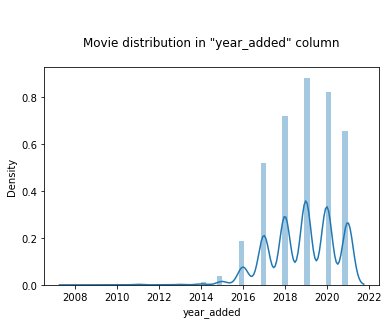



Percentage of tv show distribution in "year_added" column

2020    22
2019    22
2021    18
2018    15
2017    13
2016     6
2015     0
2014     0
2013     0
2008     0
Name: year_added, dtype: int64


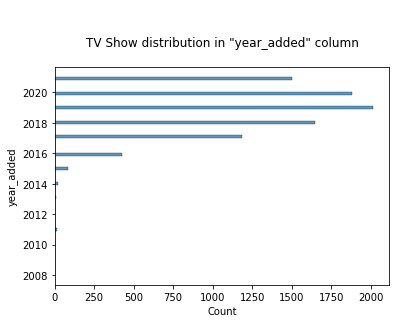



Percentage of movie distribution in "month_added" column

7     9
4     8
12    8
1     8
10    8
3     8
9     8
8     8
11    8
6     8
5     7
2     6
Name: month_added, dtype: int64


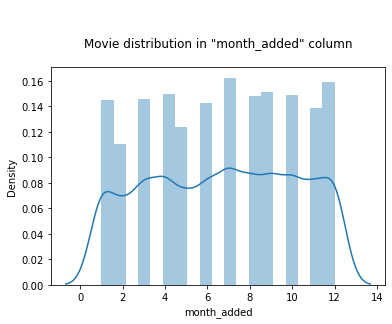



Percentage of tv show distribution in "month_added" column

12    9
7     9
9     9
8     8
6     8
10    8
4     8
3     7
11    7
5     7
1     7
2     6
Name: month_added, dtype: int64


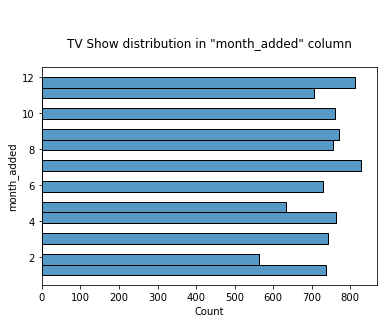



Percentage of movie distribution in "day_added" column

1     27
15     7
2      3
16     3
31     3
20     2
19     2
5      2
26     2
22     2
6      2
18     2
25     2
10     2
28     2
21     2
7      2
8      2
27     2
23     2
Name: day_added, dtype: int64


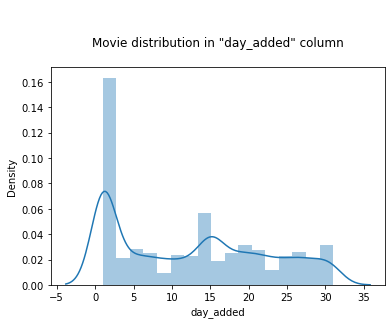



Percentage of tv show distribution in "day_added" column

1     19
15     8
30     3
31     3
2      3
22     3
20     3
10     3
14     2
19     2
16     2
8      2
17     2
6      2
18     2
27     2
7      2
5      2
23     2
21     2
Name: day_added, dtype: int64


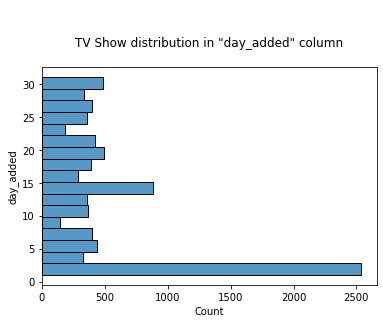



Percentage of movie distribution in "weekday_added" column

4    25
3    17
2    14
1    13
0    10
6     9
5     9
Name: weekday_added, dtype: int64


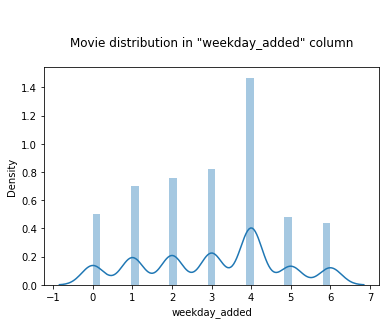



Percentage of tv show distribution in "weekday_added" column

4    34
2    14
1    12
3    12
5     9
0     8
6     6
Name: weekday_added, dtype: int64


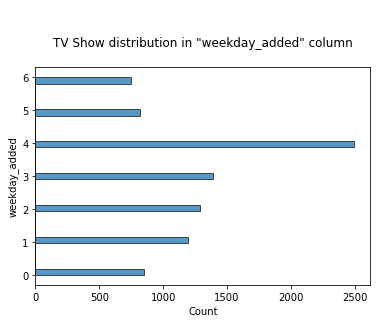



Percentage of movie distribution in "is_weekend_added" column

0    81
1    18
Name: is_weekend_added, dtype: int64


Percentage of tv show distribution in "is_weekend_added" column

0    83
1    16
Name: is_weekend_added, dtype: int64


In [232]:
print("\nPercentage of movies and tv shows distribution in Year added, Month added, Day added, Weekday added and Weekend added columns")
for column in ['year_added', 'month_added', 'day_added', 'weekday_added', 'is_weekend_added']:
    print(f"\n\nPercentage of movie distribution in \"{column}\" column\n")
    print((df[df.type == 'Movie'][['show_id', column]].drop_duplicates()[column].value_counts()*100//len(df[df.type == 'Movie'][['show_id', column]].drop_duplicates()[column])).head(20))
    if column not in ['is_weekend_added']:
        sns.distplot(df[['show_id', column]].drop_duplicates()[column]).set(title=f"\n\nMovie distribution in \"{column}\" column\n")
        plt.show()
    print(f"\n\nPercentage of tv show distribution in \"{column}\" column\n")
    print((df[df.type == 'TV Show'][['show_id', column]].drop_duplicates()[column].value_counts()*100//len(df[df.type == 'TV Show'][['show_id', column]].drop_duplicates()[column])).head(20))
    if column not in ['is_weekend_added']:
        sns.histplot(data=df[['show_id', column]].drop_duplicates(), y=column).set(title=f"\n\nTV Show distribution in \"{column}\" column\n")
        plt.show()
    

***
***
#### **14. Statistical summary of the data.**
##### The following output shows
##### 1. The stastical summary of the data.
##### 2. Boxplots displaying range of the data and outliers.

#### **Observations:**
##### a. Movies are released from 1940s to 2021. Movies released before 2000s are outliers.
##### b. TV shows are released from 1920s to 2021. TV shows released before 2010s are outliers.
##### c. Movies are added to Netflix from 2008 to 2021. Movies added to Netflix before 2015 are outliers.
##### d. TV shows are added to Netflix from 2008 to 2021. TV shows added to Netflix before 2015 are outliers.
##### e. Movies and TV shows are added throughout the month on Netflix. Majority of movies and TV shows are added to Netflix in first half of the month.
##### f. Duration of the movies go upto 312 minutes on Netflix. Movies with duration less than 50 minutes or greater than 150 minutes are outliers.

        release_year  duration_in_minutes        seasons     year_added  \
count  201766.000000        201766.000000  201766.000000  201766.000000   
mean     2013.454869            77.234470       0.531874    2018.965975   
std         9.007853            52.236637       1.274145       1.551258   
min      1925.000000             0.000000       0.000000    2008.000000   
25%      2012.000000             0.000000       0.000000    2018.000000   
50%      2016.000000            95.000000       0.000000    2019.000000   
75%      2019.000000           112.000000       1.000000    2020.000000   
max      2021.000000           312.000000      17.000000    2021.000000   

           day_added    month_added  weekday_added  is_weekend_added  
count  201766.000000  201766.000000  201766.000000     201766.000000  
mean       12.187202       6.635652       3.101251          0.190805  
std         9.847189       3.441746       1.727170          0.392937  
min         1.000000       1.000000     

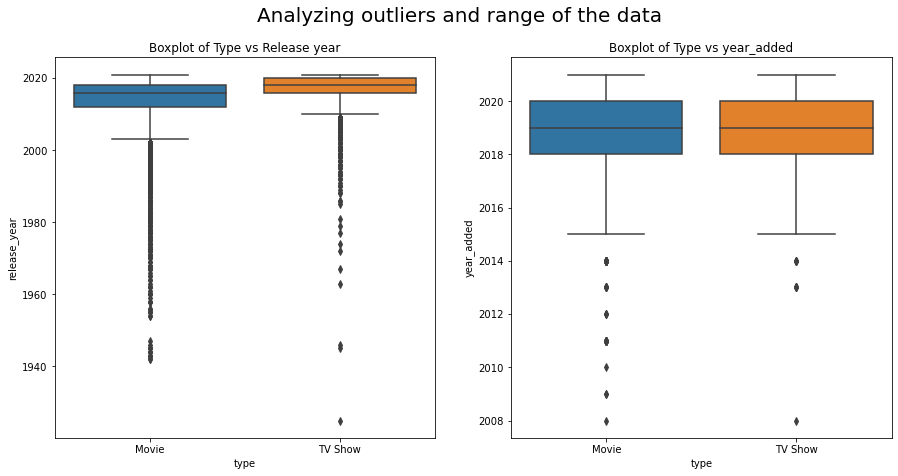

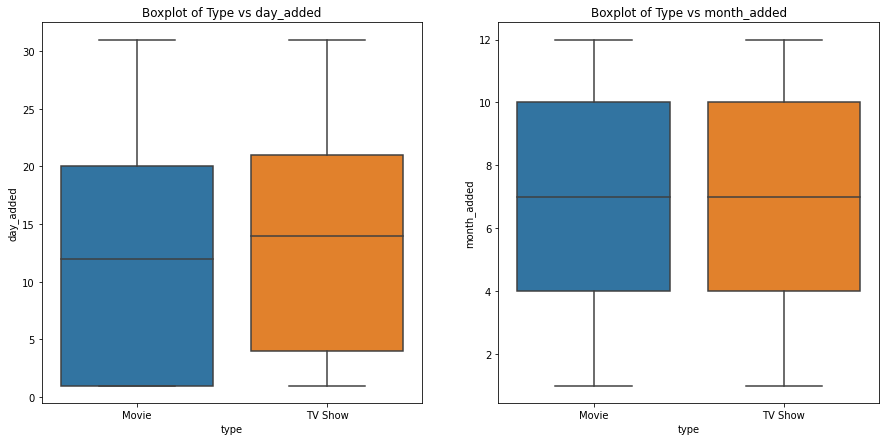

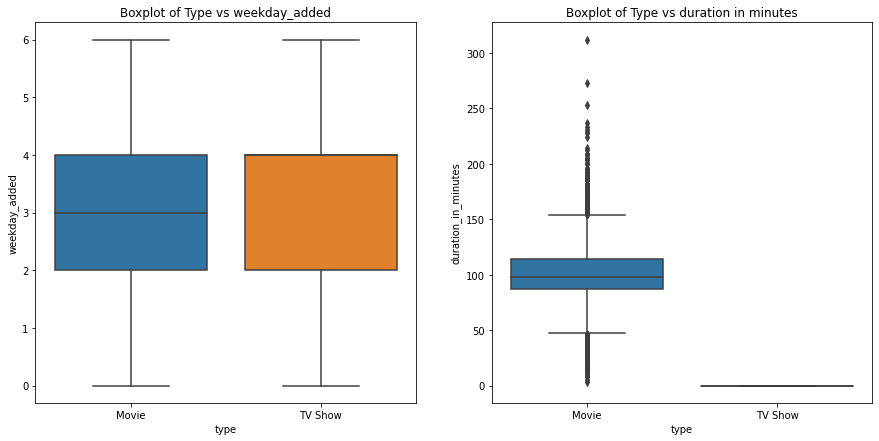

In [233]:
print(df.describe(),"\n")
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
fig.suptitle('Analyzing outliers and range of the data', fontsize=20)
axes[0].set_title('Boxplot of Type vs Release year')
sns.boxplot(ax=axes[0], x="type", y="release_year", data=df[['show_id', 'type', 'release_year']].drop_duplicates())
axes[1].set_title('Boxplot of Type vs year_added')
sns.boxplot(ax=axes[1], x="type", y="year_added", data=df[['show_id', 'type', 'year_added']].drop_duplicates())
plt.show()
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
axes[0].set_title('Boxplot of Type vs day_added')
sns.boxplot(ax=axes[0], x="type", y="day_added", data=df[['show_id', 'type', 'day_added']].drop_duplicates())
axes[1].set_title('Boxplot of Type vs month_added')
sns.boxplot(ax=axes[1], x="type", y="month_added", data=df[['show_id', 'type', 'month_added']].drop_duplicates())
plt.show()
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
axes[0].set_title('Boxplot of Type vs weekday_added')
sns.boxplot(ax=axes[0], x="type", y="weekday_added", data=df[['show_id', 'type', 'weekday_added']].drop_duplicates())
axes[1].set_title('Boxplot of Type vs duration in minutes')
sns.boxplot(ax=axes[1], x='type', y="duration_in_minutes", data=df[['show_id', 'type', 'duration_in_minutes']].drop_duplicates())
plt.show()

***
***
#### **15. Most popular actors, directors and genres in top 5 countries of the world on Netflix.**

#### **Observations:**
##### a. Anupam Kher and Samulel Jackson are most popular movie actors in India and the United States respectively.
##### b. Takahiro Sakurai and David Attenborough are most popular tv show actors in India and the United States respectively.
##### c. Jay Karas and David Dhawan are most popular movie directors in the United States and India respectively.
##### d. Alastair Fothergill and Stan Lathan are most popular tv show directors in the United Kingdom and the United States respectively.
##### e. International Movies and Dramas are most popular movie genres in India and the United States respectively.
##### f. TV Comedies and British TV Shows are most popular tv show genres in the United States and the United Kingdom respectively.
##### g. TV-MA and TV-14 are most popular movie ratings in the United States and India respectively.
##### h. TV-MA is the most popular tv show rating in both the United States and the United Kingdom.

In [234]:
movies = df[(df['type'] == 'Movie') & (df['cast']!='Unknown') & (df['country'].isin(['United States', 'India', 'United Kingdom', 'Canada', 'France']))]
tv_shows = df[(df['type'] == 'TV Show') & (df['cast']!='Unknown') & (df['country'].isin(['United States', 'United Kingdom', 'Japan', 'South Korea', 'Canada']))]
for column in ['cast', 'director', 'listed_in', 'rating']:
    print(f"\n\nTop {column} in movies by countries\n")
    m = movies[movies[column] != 'Unknown']
    m = m.groupby(['country', column])['show_id'].nunique().reset_index()
    print(m[m.groupby(['country'])['show_id'].transform(max) == m['show_id']].sort_values(by='show_id', ascending=False).iloc[:,[0, 1]].drop_duplicates(subset='country'))
    print(f"\n\nTop {column} in tv shows by countries\n")
    t = tv_shows[tv_shows[column] != 'Unknown']
    t = t.groupby(['country', column])['show_id'].nunique().reset_index()
    print(t[t.groupby(['country'])['show_id'].transform(max) == t['show_id']].sort_values(by='show_id', ascending=False).iloc[:,[0, 1]].drop_duplicates(subset='country'))




Top cast in movies by countries

              country                cast
4529            India         Anupam Kher
20710   United States   Samuel L. Jackson
9172   United Kingdom         John Cleese
942            Canada  John Paul Tremblay
4118           France      Wille Lindberg


Top cast in tv shows by countries

             country                cast
1869           Japan    Takahiro Sakurai
3442  United Kingdom  David Attenborough
6393   United States        Grey Griffin
75            Canada       Ashleigh Ball
2192     South Korea        Cho Seong-ha


Top director in movies by countries

             country        director
2508   United States       Jay Karas
726            India    David Dhawan
134           Canada  Justin G. Dyck
551           France  Thierry Donard
1324  United Kingdom   Blair Simmons


Top director in tv shows by countries

            country             director
39   United Kingdom  Alastair Fothergill
102   United States          Stan Lathan
35   

***
***
#### **16. Analysis of season counts movie duration change over the years on Netflix**

#### **Observations:**
##### a. As years passed by, tv shows with more and more number of season counts were added  to Netflix.
##### b. Over the years, movie duration on Netflix has changed significantly from average 80-120 minutes to now include short films and longer duration movies too. 

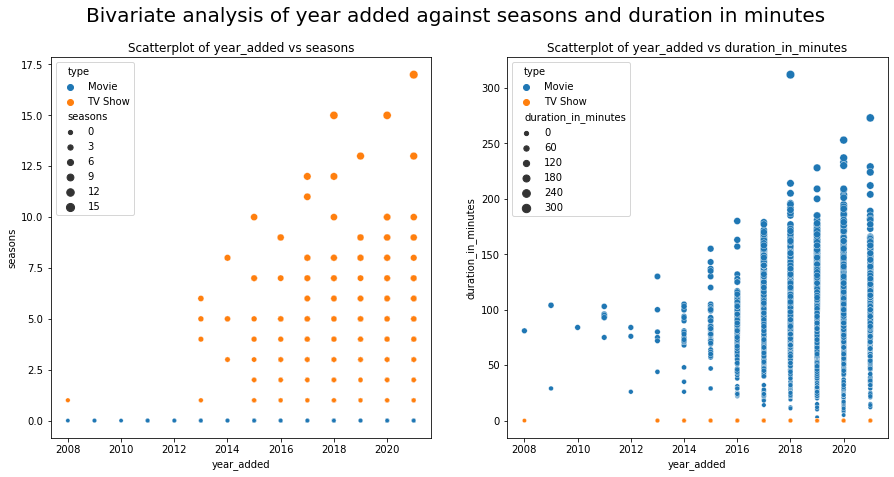

In [235]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
fig.suptitle('Bivariate analysis of year added against seasons and duration in minutes', fontsize=20)
axes[0].set_title('Scatterplot of year_added vs seasons')
sns.scatterplot(ax=axes[0], data=df[['show_id', 'year_added', 'seasons', 'type']].drop_duplicates(), x="year_added", y="seasons", hue='type', size='seasons')
axes[1].set_title('Scatterplot of year_added vs duration_in_minutes')
sns.scatterplot(ax=axes[1], data=df[['show_id', 'year_added', 'duration_in_minutes', 'type']].drop_duplicates(), x="year_added", y="duration_in_minutes", hue='type', size='duration_in_minutes')
plt.show()

***
***
#### **17. Correlation between different columns.**

#### **Observations:**
##### a. release_year column is positively correlated with seasons and day_added columns.
##### b. weekday_added column is highly correlated with is_weekend_added column. 

In [236]:
df.corr()

,release_year,duration_in_minutes,seasons,year_added,day_added,month_added,weekday_added,is_weekend_added
release_year,1.000000,-0.304265,0.146057,0.053030,0.190195,-0.031694,0.057732,-0.020477
duration_in_minutes,-0.304265,1.000000,-0.617202,0.015692,-0.113712,-0.003114,-0.036633,0.036159
seasons,0.146057,-0.617202,1.000000,0.027148,0.063419,0.001453,0.019056,-0.008762
year_added,0.053030,0.015692,0.027148,1.000000,0.030133,-0.166517,-0.054598,-0.099444
day_added,0.190195,-0.113712,0.063419,0.030133,1.000000,0.021850,-0.009397,-0.077410
month_added,-0.031694,-0.003114,0.001453,-0.166517,0.021850,1.000000,0.073362,0.094580
weekday_added,0.057732,-0.036633,0.019056,-0.054598,-0.009397,0.073362,1.000000,0.674381
is_weekend_added,-0.020477,0.036159,-0.008762,-0.099444,-0.077410,0.094580,0.674381,1.000000


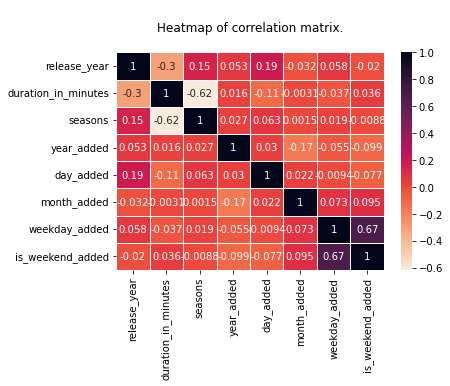

In [237]:
sns.heatmap(df.corr(), linewidths=.5, cmap=sns.cm.rocket_r, annot=True).set(title='\nHeatmap of correlation matrix.\n')
plt.show()

***
***
#### **18. Analysis of season counts and day added change over the release years on Netflix**

#### **Observations:**
##### a. As years passed by, tv shows with more and more number of season were released.
##### b. Old movies are added to Netflix on first day, last day or mid of the month compared to newly released movies which are added on all days of the month.

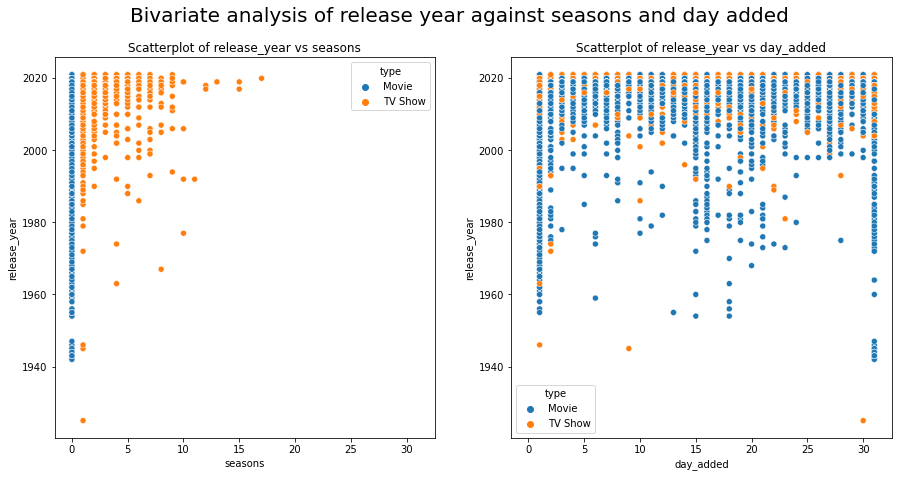

In [238]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
fig.suptitle('Bivariate analysis of release year against seasons and day added', fontsize=20)
axes[0].set_title('Scatterplot of release_year vs seasons')
sns.scatterplot(ax=axes[0], data=df[['show_id', 'release_year', 'seasons', 'type']].drop_duplicates(), x="seasons", y="release_year", hue='type')
axes[1].set_title('Scatterplot of release_year vs day_added')
sns.scatterplot(ax=axes[1], data=df[['show_id', 'release_year', 'day_added', 'type']].drop_duplicates(), x="day_added", y="release_year", hue='type')
plt.show()

***
***
#### **19. Recommendations based upon the insights gathered.**
***
##### **A**. Netflix should focus on adding content to the platform which is released in recent past, instead of adding old content.
##### **Source insights**: 5a, 14a, 14b
***
##### **B**. Netflix should add movies to its platform which are produced preferably in United States, India, United Kingdom, Canada and France.
##### **Source insights**: 5f, 7a
***
##### **C**. Netflix should add tv shows to its platform which are produced preferably in United States, United Kingdom, Japan. South Korea and Canada.
##### **Source insights**: 5f, 7a
***
##### **D**. Netflix should add tv shows to its platform which are produced preferably for mature audience only. And they should add movies to their platform which are produced preferably for audience aged 14 or more.
##### **Source insights**: 6a, 15g, 15h
***
##### **E**. Netflix should focus on adding content to their platform which preferably falls under the categories of, International movies/tv shows, Drama and Comedy.
##### **Source insights**: 8a, 15e, 15f
***
##### **F**. Netflix should collaborate with following actor-director duos to produce content for Netflix.
##### 1. Anupam Kher, David Dhawan
##### 2. Samuel Jackson, Jay Karas
##### 3. Takahiro Sakurai, Kazuya Murata
##### 4. David Attenborough, Stan Lathan
##### **Source insights**: 9a, 9b, 10a, 10b, 15a, 15b, 15c, 15d
***
##### **G**. Netflix should preferably add new movies or tv shows on 1st or 15th day of the month.
##### **Source insights**: 13b, 14e, 18b
***
##### **H**. Along with the average length feature films, Netflix should also add short films to their platform.
##### **Source insights**: 16b